<a href="https://colab.research.google.com/github/StevenDavid04/Colab/blob/main/Steven_David_Stats_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [55]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

#this is what allows for the following code to work properly

In [56]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#this defines certain aspects of future lines of codes

In [57]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

In [58]:
url = "https://docs.google.com/presentation/d/13jxCSPps1xsYIxSwlwwT_-YO25-Tq1qS45vctHWuNb8/edit#slide=id.g1a9803ca3fe_0_0"

#this is the spreadsheets link from which the images will come from

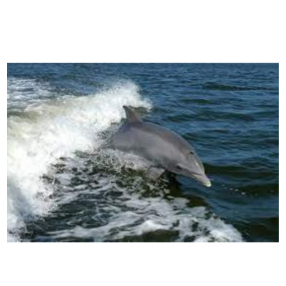

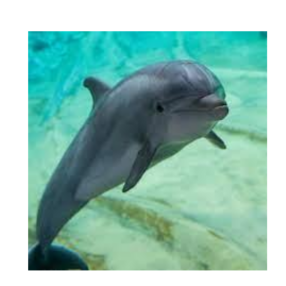

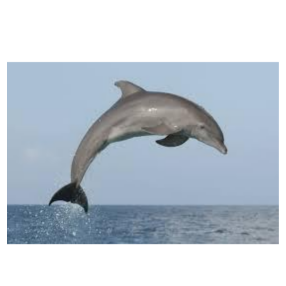

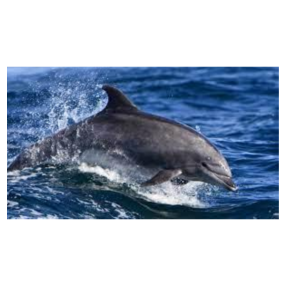

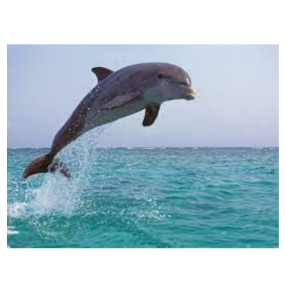

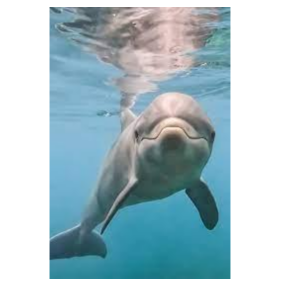

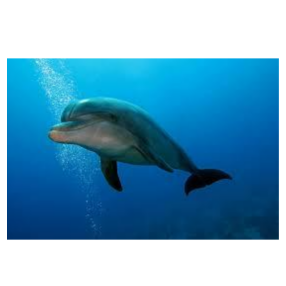

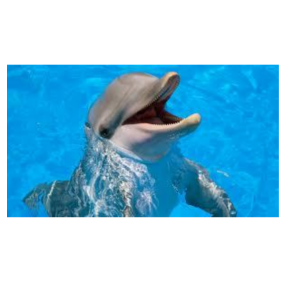

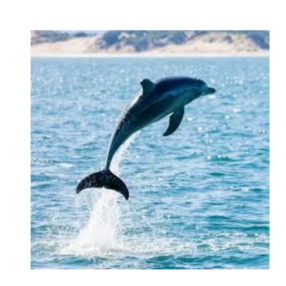

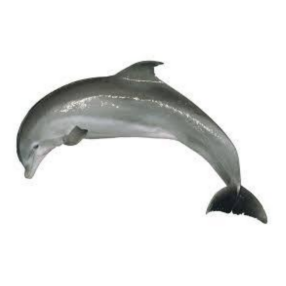

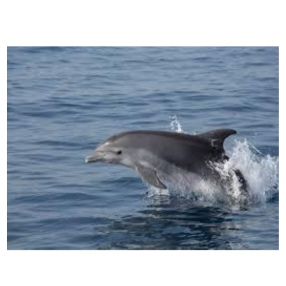

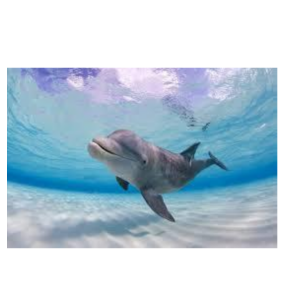

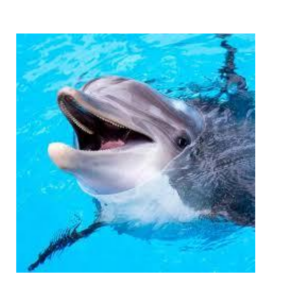

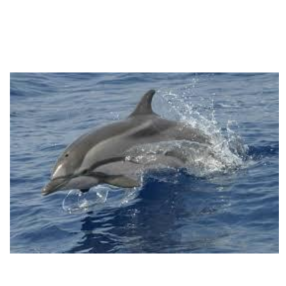

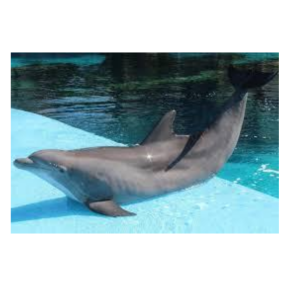

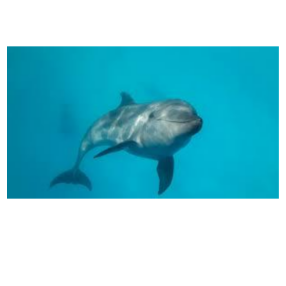

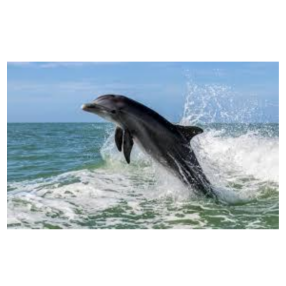

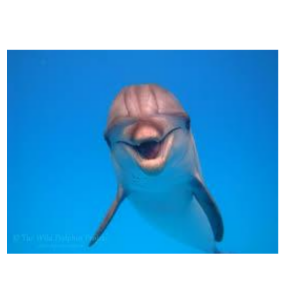

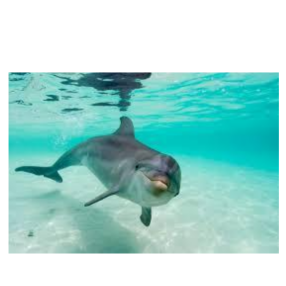

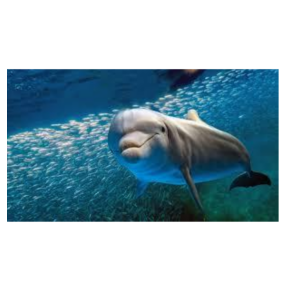

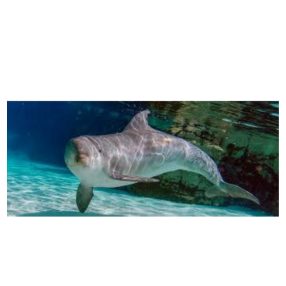

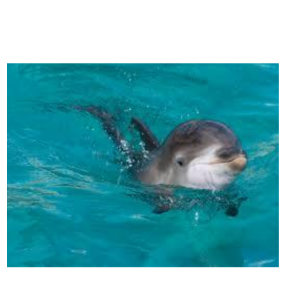

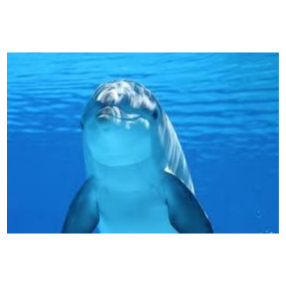

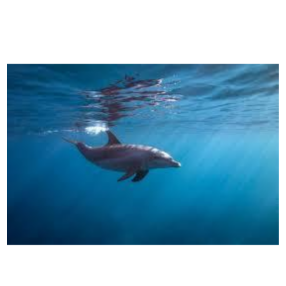

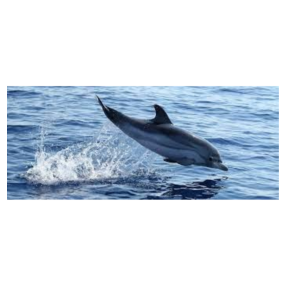

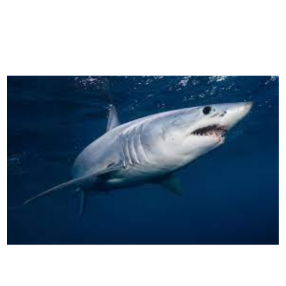

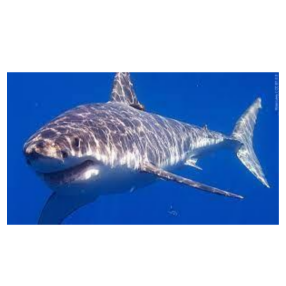

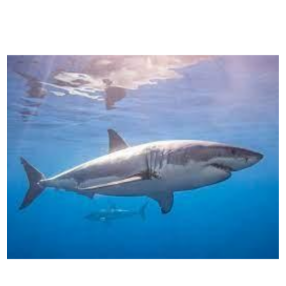

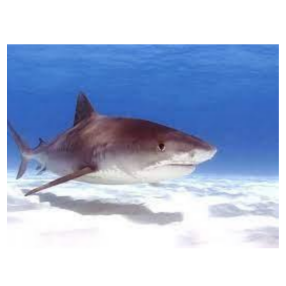

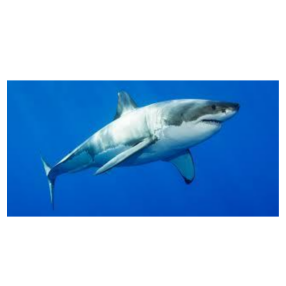

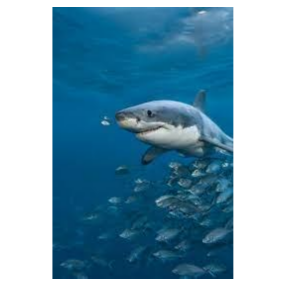

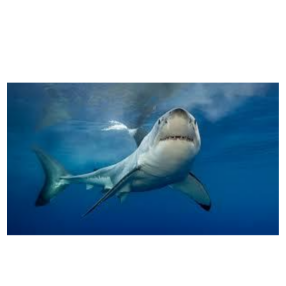

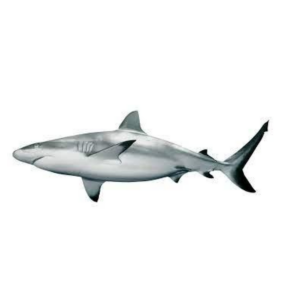

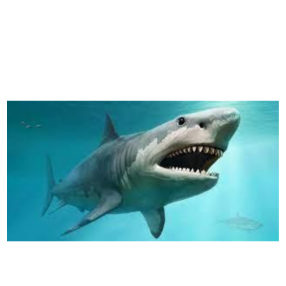

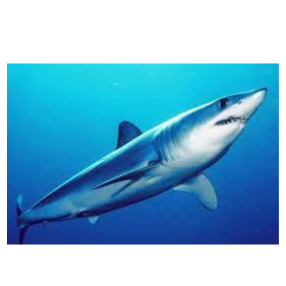

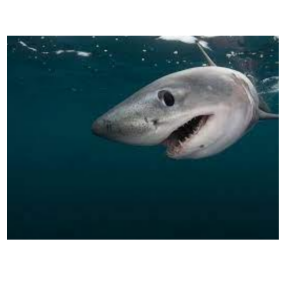

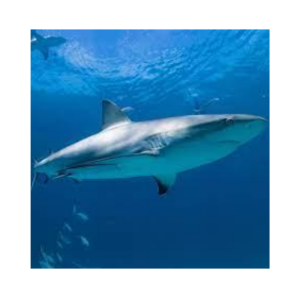

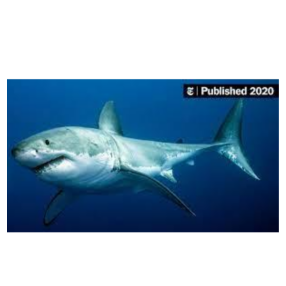

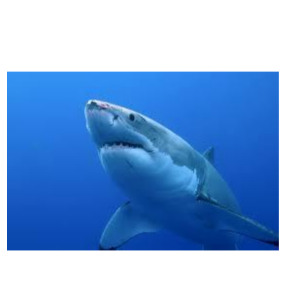

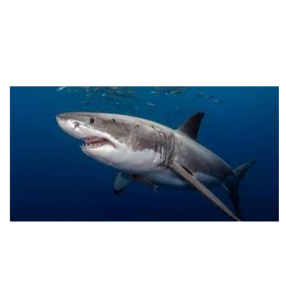

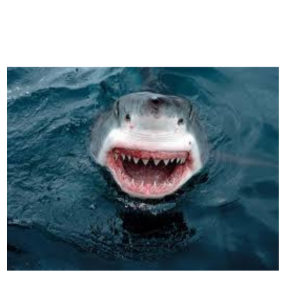

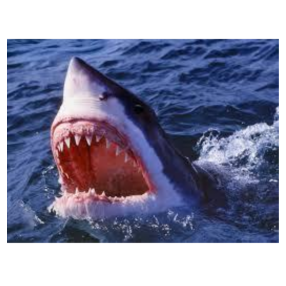

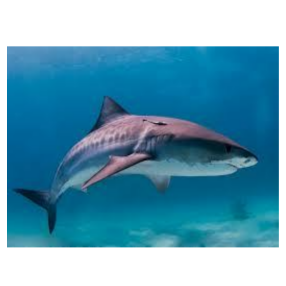

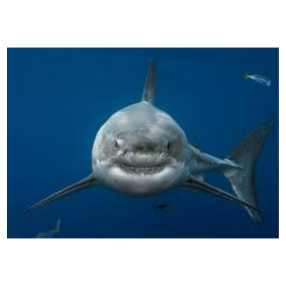

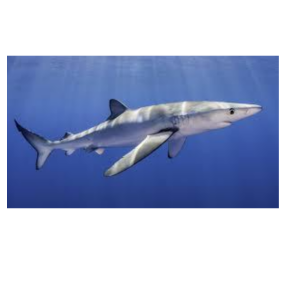

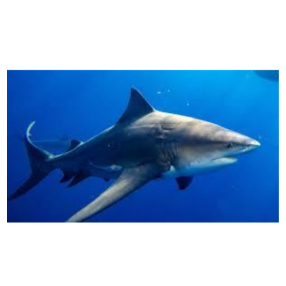

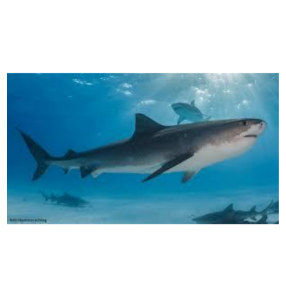

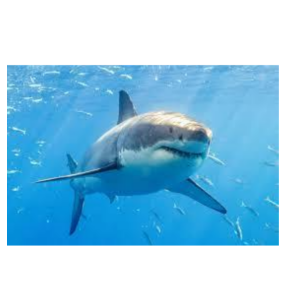

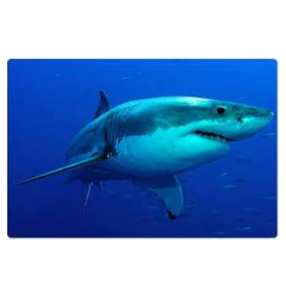

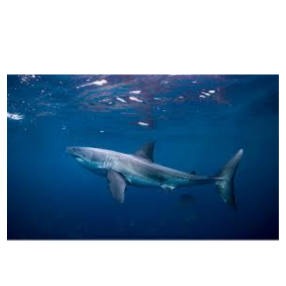

In [59]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

#displays all the images i collected and put on the spreadsheet through the url

In [64]:
images.shape

#tells us the image size, the width and height and number of channels within the image

torch.Size([50, 3, 224, 224])

In [65]:
model(images)

#puts a numerical value on the images for ai purposes

tensor([[ 3.9694, -1.3929,  7.2451,  ..., -4.1539, -0.9599,  0.4700],
        [ 3.0914, -1.4242,  5.1510,  ..., -2.5566,  0.6744,  0.9064],
        [ 2.7159, -6.4735,  8.9971,  ..., -2.5613, -2.2388,  0.0341],
        ...,
        [ 4.1436, -1.9669, 13.1538,  ...,  1.8543, -0.4624,  1.6063],
        [ 0.7435,  1.3992,  8.4743,  ..., -0.5126, -0.0512,  2.8972],
        [ 0.6693,  0.3733,  7.7087,  ..., -1.2817, -1.0896,  0.8010]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [66]:
y = model(images)

#defines y

In [67]:
y.shape

torch.Size([50, 1000])

In [68]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [69]:
for i in list(guesses):
    print(labels[i])

#lists all of the guesses the code believes the images to be

grey whale, gray whale, devilfish, Eschrichtius gibbosus, Eschrichtius robustus
dugong, Dugong dugon
albatross, mollymawk
grey whale, gray whale, devilfish, Eschrichtius gibbosus, Eschrichtius robustus
albatross, mollymawk
snorkel
hammerhead, hammerhead shark
sleeping bag
killer whale, killer, orca, grampus, sea wolf, Orcinus orca
eel
grey whale, gray whale, devilfish, Eschrichtius gibbosus, Eschrichtius robustus
tiger shark, Galeocerdo cuvieri
tiger shark, Galeocerdo cuvieri
grey whale, gray whale, devilfish, Eschrichtius gibbosus, Eschrichtius robustus
swimming trunks, bathing trunks
platypus, duckbill, duckbilled platypus, duck-billed platypus, Ornithorhynchus anatinus
grey whale, gray whale, devilfish, Eschrichtius gibbosus, Eschrichtius robustus
stethoscope
snorkel
dugong, Dugong dugon
barracouta, snoek
hamster
oxygen mask
platypus, duckbill, duckbilled platypus, duck-billed platypus, Ornithorhynchus anatinus
grey whale, gray whale, devilfish, Eschrichtius gibbosus, Eschrichtius r

In [70]:
Y = np.zeros(50,)
Y[25:] = 1

#defines Y

In [71]:
Y

#shows Y in an array

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [75]:
X = y.detach().cpu().numpy() 

#defines X

In [76]:
X.shape



(50, 1000)

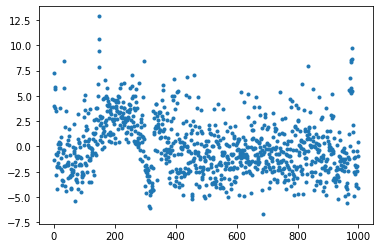

In [77]:
plt.plot(X[0],'.')

#plots all of the image data

In [78]:
X[0]

array([ 3.96935511e+00, -1.39292419e+00,  7.24514103e+00,  5.67823124e+00,
        3.78816509e+00,  5.88072491e+00,  3.50244522e+00, -2.84618473e+00,
       -7.03818679e-01, -8.74665380e-01, -2.02927637e+00, -1.97518814e+00,
       -4.25661993e+00,  2.25300431e-01, -5.90558708e-01, -1.65248299e+00,
       -2.05707550e+00,  4.31537896e-01, -1.42958701e-01, -1.81731254e-01,
        3.78765225e+00,  3.83209854e-01,  2.64725208e-01,  8.97973597e-01,
       -2.21535659e+00, -1.16934741e+00, -3.77326536e+00, -2.44918847e+00,
       -3.35717058e+00, -3.09244454e-01, -6.20505452e-01, -3.46497703e+00,
       -1.94018006e+00,  5.73235655e+00,  8.41680050e+00, -3.76741529e-01,
        1.92246890e+00, -3.89217901e+00, -1.89193177e+00,  3.54094553e+00,
       -4.41721439e+00, -9.92716432e-01, -1.71434379e+00,  2.15730846e-01,
       -1.88386464e+00, -1.53649902e+00, -3.09136581e+00, -1.79014325e+00,
        6.65976882e-01,  1.02468038e+00,  1.69165313e-01,  1.67370462e+00,
       -3.04728484e+00, -

In [79]:
np.argmax(X[0])

147

In [80]:
labels[948]

'Granny Smith'

In [81]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [82]:
for i in top_ten:
    print(labels[i])

  #shows us the most common labels that were guessed

grey whale, gray whale, devilfish, Eschrichtius gibbosus, Eschrichtius robustus
killer whale, killer, orca, grampus, sea wolf, Orcinus orca
seashore, coast, seacoast, sea-coast
dugong, Dugong dugon
volcano
promontory, headland, head, foreland
ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus
leatherback turtle, leatherback, leathery turtle, Dermochelys coriacea
lakeside, lakeshore
submarine, pigboat, sub, U-boat


In [83]:
labels

#shows us ALL of the labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([ 21., 131., 270., 269., 162., 100.,  33.,  10.,   3.,   1.]),
 array([-6.67416  , -4.720025 , -2.7658896, -0.8117546,  1.1423805,
         3.0965157,  5.0506506,  7.004786 ,  8.958921 , 10.913056 ,
        12.867191 ], dtype=float32),
 <a list of 10 Patch objects>)

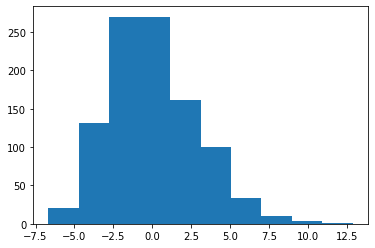

In [84]:
plt.hist(X[0])

#plots the data in a hitsogram

In [86]:
X = GPU_data(X)
Y = GPU_data(Y)

#defines X and Y


<ipython-input-56-3a350ce25893>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


In [87]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [88]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [89]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [90]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [91]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [92]:
X.shape

torch.Size([50, 1000])

In [93]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [94]:
def model(x,w):

    return x@w[0]

In [95]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [96]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


<ipython-input-56-3a350ce25893>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


https://tensorspace.org/